In [1]:
## 引入头文件
import cv2
import numpy as np
from skimage import filters, feature, img_as_float, measure, morphology
import os
import matplotlib.pyplot as plt
from skimage.feature import shape_index
from skimage.draw import circle
from skimage.filters import try_all_threshold
from skimage.segmentation import chan_vese
from skimage.filters import threshold_otsu, threshold_triangle

In [2]:
## 定义路径
# 将path定义为图片文件夹的路径
path = r'C:\Users\Kfor\Desktop\亚太\2019 APMCM Problems\2019 APMCM Problems\A_source'
os.chdir(path)

In [3]:
#自动检测坩埚位置的参数，级边框位置
lineWidth = 5
# upInner = 150
upInner = 68
# downInner = 1050
downInner = 1075
leftInner = 504
rightInner = 1608

In [4]:
# 自动标记边框的四条线的参数，并导出图像的函数 
def checkAndDrawBorder(filename,imageTest,leftInner,upInner,rightInner,downInner):
    i = 0
    maxStep = 200
    leftThreshold = 100
    upThreshold = 220
    rightThreshold = 212
    downThreshold = 160
    while((imageTest[500:580,leftInner-lineWidth:leftInner] < leftThreshold).any()) :
        leftInner -= 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[500:580,leftInner+1] < leftThreshold).any() == False) :
        leftInner += 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[upInner-lineWidth:upInner,966:1150] <upThreshold).any()) :
        upInner -= 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[upInner + 1,966:1150] < upThreshold).any() == False) :
        upInner += 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[500:640,rightInner:rightInner + lineWidth] < rightThreshold).any()) :
        rightInner += 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[500:640,rightInner - 1] < rightThreshold).any() == False) :
        rightInner -= 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[downInner:downInner + lineWidth,966:1150] < downThreshold).any()) :
        downInner += 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[downInner-1, 966:1150] < downThreshold).any() == False) :
        downInner -= 1
        i += 1
        if(i>maxStep):
            break
    imageTest[upInner-lineWidth:upInner,:] = 0
    imageTest[downInner:downInner+lineWidth,:] = 0
    imageTest[:,leftInner-lineWidth:leftInner] = 0
    imageTest[:,rightInner:rightInner+lineWidth] = 0
    # 在上级目录建立新的文件夹用于存储消抖动图片
    image = imageTest[upInner:downInner,leftInner:rightInner]
    cv2.imwrite("../Antij_source/"+filename,imageTest)
    cv2.imwrite("../Antij_source_result/"+filename,image)
    
    return [leftInner,upInner,rightInner,downInner]

In [5]:
## 通过上述区域选择来消除抖动，并得到消抖之后的图片

# 建立储存带框的坩埚图的文件夹
try:
    os.makedirs('../Antij_source')
    os.makedirs('../Antij_source_result')
except:
    pass
source_list = os.listdir()
#antij_dic = {} # 有抖动的bmp字典，对应偏移的y，x值
# print(source_list)

for oneImage in source_list:
    # 读入
    imageTest = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
    imageTest = cv2.equalizeHist(imageTest)
    
    checkAndDrawBorder(oneImage,imageTest,leftInner,upInner,rightInner,downInner)
    

In [6]:
## 用于裁剪图片到相同大小 

os.chdir('../Antij_source_result')
for oneImage in os.listdir():
    image = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
    height = np.shape(image)[0]
    width = np.shape(image)[1]
    imageResult = image[height-994:height,0:1095]
    cv2.imwrite(oneImage,imageResult)

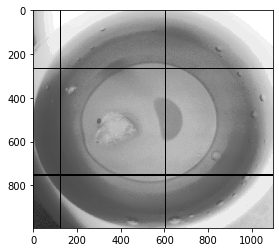

In [9]:
## 裁剪至小框

os.chdir('../Antij_source_result')

imageTest = cv2.imread('0511.bmp',cv2.IMREAD_GRAYSCALE)

# 定义用来标记边框的四条线的参数
lineWidth = 5
upInner = 270
downInner = 750
leftInner = 130
rightInner = 600

imageTest[upInner-lineWidth:upInner,:] = 0
imageTest[downInner:downInner+lineWidth,:] = 0
imageTest[:,leftInner-lineWidth:leftInner] = 0
imageTest[:,rightInner:rightInner+lineWidth] = 0

plt.imshow(imageTest,cmap=plt.cm.gray)

def getInner(imageTest):
    upInner = 270
    downInner = 750
    leftInner = 130
    rightInner = 600
    image = imageTest[upInner:downInner,leftInner:rightInner]
    return image


for oneImage in os.listdir():
    # 读入
    imageTest = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
    imageTest = cv2.equalizeHist(imageTest)
    # 覆盖写回
    image = getInner(imageTest)

    try:
        os.makedirs('../InnerArea')
    except:
        pass

    cv2.imwrite('../InnerArea/'+oneImage, image)
    